In [ ]:
import requests

import pandas as pd

import datetime as dt

In [ ]:
stock_id = '2454'

date = dt.date.today().strftime("%Y%m%d")

print('今日日期：', date)

stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

json_data = stock_data.json()

df = pd.DataFrame(data=json_data['data'],columns=json_data['fields'])
display(df)

今日日期： 20250913


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"3,937,354","5,364,125,515","1,370.00","1,380.00","1,350.00","1,360.00",-10.00,"12,737"
1,114/09/02,"3,365,146","4,596,124,440","1,360.00","1,380.00","1,360.00","1,360.00",0.00,"5,893"
2,114/09/03,"4,795,588","6,658,413,350","1,380.00","1,400.00","1,370.00","1,395.00",+35.00,"8,519"
3,114/09/04,"3,501,155","4,872,588,395","1,405.00","1,405.00","1,380.00","1,385.00",-10.00,"7,014"
4,114/09/05,"9,434,638","13,369,682,190","1,400.00","1,435.00","1,395.00","1,435.00",+50.00,"22,501"
5,114/09/08,"6,680,707","9,627,626,360","1,450.00","1,460.00","1,425.00","1,430.00",-5.00,"13,857"
6,114/09/09,"11,956,440","17,720,448,190","1,445.00","1,515.00","1,435.00","1,510.00",+80.00,"31,125"
7,114/09/10,"6,863,070","10,292,368,080","1,520.00","1,520.00","1,485.00","1,490.00",-20.00,"15,438"
8,114/09/11,"4,767,141","7,122,159,225","1,505.00","1,510.00","1,480.00","1,480.00",-10.00,"13,167"
9,114/09/12,"4,412,355","6,544,585,155","1,495.00","1,500.00","1,470.00","1,485.00",+5.00,"9,791"


In [ ]:
import requests
import pandas as pd

stock_id = "2454"
url = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY"
params = {
    "response": "json",
    "date": "20250901",
    "stockNo": stock_id
}
headers = {"User-Agent": "Mozilla/5.0"}

r = requests.get(url, params=params, headers=headers, timeout=15)
r.raise_for_status()
payload = r.json()
if payload.get("stat") not in ("OK", "ok"):
    raise RuntimeError(f"TWSE 回傳非 OK：{payload.get('stat')}")
df = pd.DataFrame(payload["data"], columns=payload["fields"])

df.rename(columns=lambda c: str(c).strip().replace("\ufeff", ""), inplace=True)
def minguo_to_dt(x):
    # 例如 '114/09/11'
    y, m, d = str(x).strip().split("/")
    return pd.Timestamp(int(y) + 1911, int(m), int(d))

df["日期"] = df["日期"].map(minguo_to_dt)
start_date = pd.Timestamp(2025, 9, 10)
end_date   = pd.Timestamp(2025, 9, 12)
filtered_df = df[(df["日期"] >= start_date) & (df["日期"] <= end_date)]

print(filtered_df)


          日期       成交股數            成交金額       開盤價       最高價       最低價  \
7 2025-09-10  6,863,070  10,292,368,080  1,520.00  1,520.00  1,485.00   
8 2025-09-11  4,767,141   7,122,159,225  1,505.00  1,510.00  1,480.00   
9 2025-09-12  4,412,355   6,544,585,155  1,495.00  1,500.00  1,470.00   

        收盤價    漲跌價差    成交筆數  
7  1,490.00  -20.00  15,438  
8  1,480.00  -10.00  13,167  
9  1,485.00   +5.00   9,791  


**Note:** Please make sure to run the cell above that defines the `df` DataFrame before executing this cell.

**Note:** Please make sure to run the cell above that defines the `df` DataFrame before executing this cell.

**Note:** Please make sure to run the cell above that defines the `df` DataFrame before executing this cell.

In [ ]:
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

for date in date_list:
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:
        stock_data = requests.get(url)

        json_data = stock_data.json()

        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        print(f'無法取得{date}的資料, 可能資料量不足.')

print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年07月01日   4.24   113  19.51  5.24  114/1
1   114年07月02日   4.17   113  19.81  5.32  114/1
2   114年07月03日   4.25   113  19.43  5.22  114/1
3   114年07月04日   4.19   113  19.74  5.30  114/1
4   114年07月07日   4.22   113  19.58  5.26  114/1
5   114年07月08日   4.25   113  19.43  5.22  114/1
6   114年07月09日   3.99   113  20.73  5.57  114/1
7   114年07月10日   3.86   113  21.42  5.75  114/1
8   114年07月11日   3.80   113  21.73  5.84  114/1
9   114年07月14日   3.90   113  21.19  5.69  114/1
10  114年07月15日   3.87   113  21.34  5.73  114/1
11  114年07月16日   3.83   113  21.57  5.80  114/1
12  114年07月17日   3.88   113  21.27  5.71  114/1
13  114年07月18日   3.83   113  21.57  5.80  114/1
14  114年07月21日   3.79   113  21.80  5.86  114/1
15  114年07月22日   3.78   113  21.88  5.88  114/1
16  114年07月23日   3.78   113  21.88  5.88  114/1
17  114年07月24日   3.78   113  21.88  5.88  114/1
18  114年07月25日   3.78   113  21.88  5.88  114/1
19  114年07月28日   3.86   113  21.42  5.75

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

import pandas as pd

import datetime as dt

In [ ]:
stock_id = "2454.tw"

end = dt.date.today()
start = end - dt.timedelta(days=180)

df = yf.download(stock_id, start=start, end=end).reset_index()

df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3192373263.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-17,1397.490356,1412.200781,1387.683407,1387.683407,4878893
1,2025-03-18,1446.525146,1471.042522,1417.104296,1422.007771,10224305
2,2025-03-19,1436.718140,1485.752888,1431.814665,1471.042464,7855359
3,2025-03-20,1456.332031,1471.042456,1436.718132,1466.138981,6419295
4,2025-03-21,1451.428589,1471.042489,1446.525114,1466.139014,4597519
...,...,...,...,...,...,...
120,2025-09-08,1430.000000,1460.000000,1425.000000,1450.000000,6384542
121,2025-09-09,1510.000000,1515.000000,1435.000000,1445.000000,10954327
122,2025-09-10,1490.000000,1520.000000,1485.000000,1520.000000,6557814
123,2025-09-11,1480.000000,1510.000000,1480.000000,1505.000000,4509127


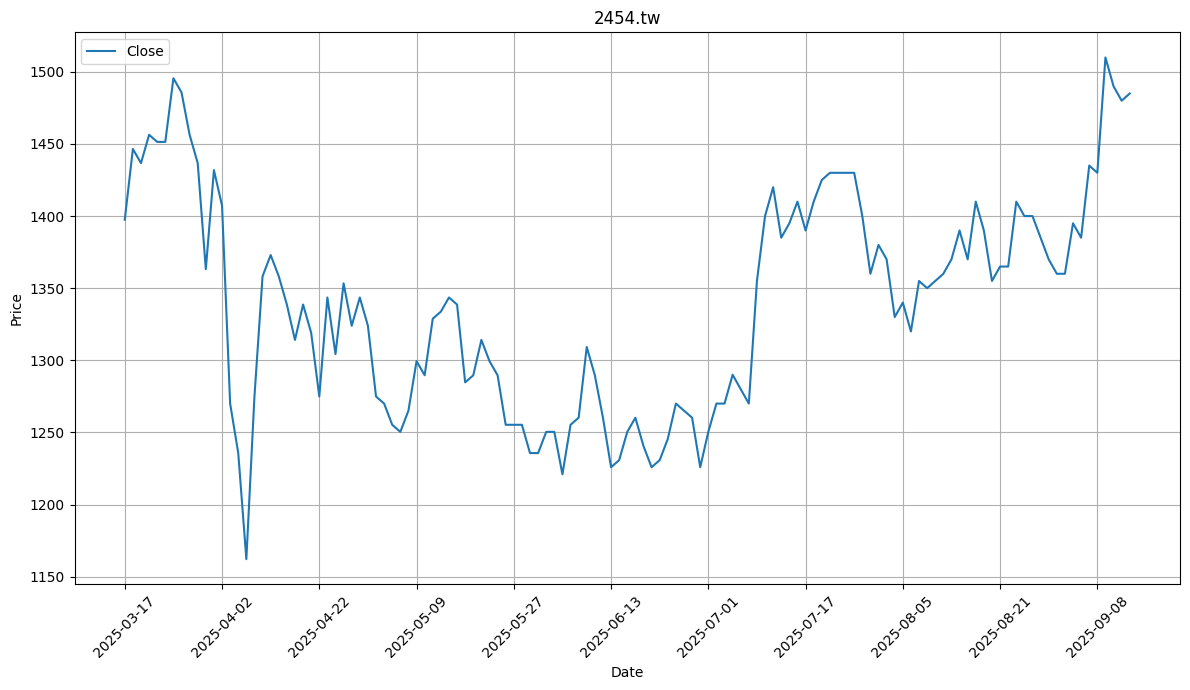

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.plot(df['Close'], label='Close')

num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num],
           rotation = 45)

plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime, timedelta
from bs4 import BeautifulSoup

In [ ]:
def yahoo_stock(stock_id):
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')
    fields = []
    datas = []
    for table_soup in table_soups:
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '':
                continue
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    df = pd.DataFrame([datas], columns=fields)

    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)
    return df

'''main'''
stock_id = '2454'
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/09/12 14:30,2454,"1,485","1,495","1,500","1,470","1,483",61.82,"1,480",0.34%,5.00,"4,168","4,499",2.03%


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2454', 'income-statement']
income-statement


In [ ]:
def url_find(url):

    words = url.split('/')
    laset_word = words[-1]
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})
    table_fields=table_soup.find('div', class_='table-header')

    table_fields_lines = list(table_fields.stripped_strings)

    data_rows = table_soup.find_all('li' ,class_='List(n)')
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'
df = url_find(url).transpose()
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)
print(df)

      年度/季別        營業現金流        投資現金流         融資現金流        自由現金流         淨現金流
0   2025 Q2   45,668,702  -10,211,839   -25,935,974   35,456,863  -10,340,490
1   2025 Q1   13,422,960   -7,533,380   -16,140,055    5,889,580   -8,006,846
2   2024 Q4   44,685,106   -7,154,039   -18,398,236   37,531,067   23,865,564
3   2024 Q3   36,225,390   -3,844,253   -38,885,321   32,381,137  -10,021,666
4   2024 Q2   49,940,309   -6,658,630     1,044,681   43,281,679   46,506,722
5   2024 Q1   25,203,802  -18,270,771   -33,880,500    6,933,031  -22,050,738
6   2023 Q4  101,535,803   -7,473,428   -24,883,601   94,062,375   61,441,001
7   2023 Q3   14,965,923      -55,159   -94,030,944   14,910,764  -74,138,933
8   2023 Q2   46,732,056  -11,261,743      -321,234   35,470,313   38,397,580
9   2023 Q1    2,857,540   -9,955,371       666,640   -7,097,831   -7,805,793
10  2022 Q4   59,033,666   -2,917,809   -45,660,701   56,115,857    5,933,559
11  2022 Q3   19,259,359  -15,042,491  -110,117,810    4,216,868